In [1]:
# Imports

from ipynb.fs.full.BreastFunctions import *
#from BreastFunctions_py import *
import numpy as np
import pandas as pd

def rescale(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)
def rescale_AB(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return ( (arr - arr_min) / (arr_max - arr_min)  ) * 255 - 128

# %matplotlib qt

In [3]:
# Colors and functions for colors
def CreateColorMap(NumberofColors , colorsArray ):
    cmap = LinearSegmentedColormap.from_list('cmap', colorsArray, N=NumberofColors)
    return cmap
    
def CreateColorMap_Continuous(NumberofColors , colorsArray ):
    cvals = np.arange(0,NumberofColors-1)
    colors = colorsArray
    norm=plt.Normalize(min(cvals),max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    
    return cmap

colorarray8=[ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo","#7f0000","#ff7f00"]
colorsarray7 = [ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo","#7f0000"]
colorsarray6 = [ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo"]
colorsarray5 = [ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia"]

colorsarrayTSNE = ["olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo","#7f0000","#ff7f00"]
colorsarray_5_TSNE = ["olivedrab","gold","darkturquoise", "wheat","fuchsia"]

cmap8 = CreateColorMap(9,colorarray8)
cmapTSNE= CreateColorMap(8,colorsarrayTSNE)

cmap7 = CreateColorMap(8,colorsarray7)
cmap6 = CreateColorMap(7,colorsarray6)

cmap5 = CreateColorMap(6,colorsarray5)
cmap5_TSNE = CreateColorMap(5,colorsarray_5_TSNE)

In [206]:
# Only load if needed to load total results from previous runs to continue on
total_results_dataframe_norm_SVM = pd.read_csv("total_breastCancer_results_norm_SVM.csv")
total_results_dataframe_norm_KNN = pd.read_csv("total_breastCancer_results_norm_KNN.csv")

# Prepare this dataframe (total results) only once
# total_results_dataframe_norm_SVM = pd.DataFrame(columns=["Patient to be predicted/left out" , "Metastasis-Free Subpopulation" , "Metastasis Subpopulation" , "Predicted Metastasis" ,
# "Metastasis Status", "Number of Clusters" , "SAM Features for each tSNE run on new subset"])

# total_results_dataframe_norm_KNN= pd.DataFrame(columns=["Patient to be predicted/left out" , "Metastasis-Free Subpopulation" , "Metastasis Subpopulation" , "Predicted Metastasis" ,
# "Metastasis Status", "Number of Clusters" , "SAM Features for each tSNE run on new subset"])



In [3]:
# Reading Data
HE_image , MSI_data_cube , goodlist, peak_list, pixel_to_sample_ID, sample_only_data , sample_ID_pixels = ReadBreastData()

In [195]:
## Selecting Patient as test
testPatient_ID = 32 
#-------------------------------------------------------

# Splitting data into train and test and scaled and non_scaled
train_scaled_data,train_data,train_ID_pixels,test_scaled_data,test_data,test_ID_pixels = SplitData(ID = testPatient_ID ,
        sample_only_data = sample_only_data,
        sample_ID_pixels = sample_ID_pixels )

scaler = MinMaxScaler()
train_normalized_data = scaler.fit_transform(train_data)

In [137]:
# Run tSNE Model

# tsne_results = tSNE(train_scaled_data)
# np.save("patient_TSNE/BreastCancer_tSNE_Normalized_Model_Patient_{}".format(testPatient_ID) , tsne_results)

In [196]:
# Load tSNE model instead of running model if needed
tsne_results = np.load("patient_TSNE/BreastCancer_tSNE_Normalized_Model_Patient_{}.npy".format(testPatient_ID))

In [197]:
# # Visualize tSNE in 2D

# tsne_df = pd.DataFrame(data=tsne_results[:],columns=["tSNE_dim1","tSNE_dim2","tSNE_dim3"])
# tsne_df['pixel_ID'] = train_ID_pixels
# tsne_df['L_Component'] = tsne_results[:,0]
# tsne_df['A_Component'] = tsne_results[:,1]
# tsne_df['B_Component'] = tsne_results[:,2]

# LAB_mapping = [ tsne_df['L_Component'] , tsne_df['A_Component'] , tsne_df['B_Component'] ]
# LAB_colors = np.asarray(LAB_mapping)
# LAB_colors = LAB_colors.swapaxes(0,1)

# L = rescale(LAB_colors[:,0]) * 100
# A = rescale_AB(LAB_colors[:,1])
# B = rescale_AB(LAB_colors[:,2])
# LAB_colors = np.asarray( [ L , A, B ] )
# LAB_colors = LAB_colors.swapaxes(0,1)
# RGB_colors = lab2rgb(LAB_colors)

# fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# # sns.set(rc = {'figure.figsize':(15,8)})
# marker_size = 9

# sns.scatterplot(
#     ax = axes[0],
#     x = "tSNE_dim1", y="tSNE_dim2",
#     c = RGB_colors,
#     s = marker_size,
#     data = tsne_df
# )
# axes[0].set_title("tSNE Dimension 1 & tSNE Dimension 2 Plot")

# sns.scatterplot(
#     ax = axes[1],
#     x = "tSNE_dim1", y="tSNE_dim3",
#     c = RGB_colors,
#     s = marker_size,
#     data = tsne_df
# )
# axes[1].set_title("tSNE Dimension 1 & tSNE Dimension 3 Plot")

# sns.scatterplot(
#     ax = axes[2],
#     x = "tSNE_dim2", y="tSNE_dim3",
#     c = RGB_colors,
#     s = marker_size,
#     data = tsne_df
# )
# axes[2].set_title("tSNE Dimension 2 & tSNE Dimension 3 Plot")



# plt.tight_layout()
# plt.show()



In [198]:
# # Visualize tSNE in 2D
# %matplotlib qt
# ax = plt.figure(figsize=(16,10)).gca(projection='3d')
# scatter_3d = ax.scatter(
#     xs=tsne_df['tSNE_dim1'], 
#     ys=tsne_df['tSNE_dim2'],
#     zs= tsne_df['tSNE_dim3'],
#     c = RGB_colors,
#     s = 5,
#     alpha = 1,
# )
# # ax.set_xlim(-40,40)
# # ax.set_ylim(-40,40)
# # ax.set_zlim(-40,40)
# ax.set_xlabel('tSNE_dim1')
# ax.set_ylabel('tSNE_dim2')
# ax.set_zlabel('tSNE_dim3')
# ax.set_title("tSNE Colored map")

# fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# # elev is z-axis, +ve moves up, -ve moves down
# # azim is x axis, +ve moves right, -ve moves left
# ax.view_init(elev = 20 , azim = -160) 
# plt.tight_layout()

In [199]:
# Run KMeans clustering from 3 to 10 clusters for metastasis analysis
kmeans_11, kmeans_10, kmeans_9, kmeans_8, kmeans_7, kmeans_6, kmeans_5, kmeans_4, kmeans_3 = KMeans_results(tsne_results)

# For patient 25 only , kmeans_11 is used

In [200]:
# Read Clinical Data
Clinical_data = ReadClinicalData(testPatient_ID , "ClinicalData.xlsx")
Clinical_data_full = pd.read_excel("ClinicalData.xlsx","Breast Cancer Clinical Data")

NonMetastasis: [3. 1. 0. 2. 1. 1. 0. 4. 2. 4. 3.]
Metastasis: [ 2.  4.  6.  1.  2.  2. 12.  6.  3.  1.  7.]


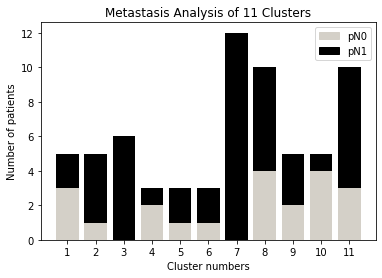

NonMetastasis: [1. 4. 4. 2. 2. 3. 2. 0. 0. 1.]
Metastasis: [ 1.  6.  1.  3.  2.  7.  1. 12.  6.  3.]


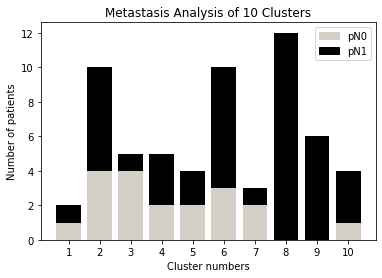

NonMetastasis: [3. 1. 4. 0. 2. 0. 4. 2. 2.]
Metastasis: [ 6.  2.  6.  7.  1. 11.  1.  2.  4.]


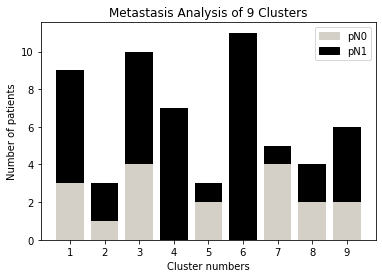

NonMetastasis: [4. 0. 5. 2. 2. 1. 2. 1.]
Metastasis: [ 6. 10.  1.  4.  2.  1.  7.  3.]


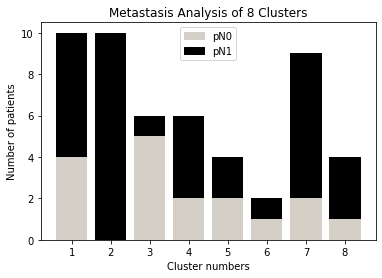

NonMetastasis: [5. 4. 3. 3. 1. 2. 2.]
Metastasis: [1. 7. 1. 2. 4. 4. 9.]


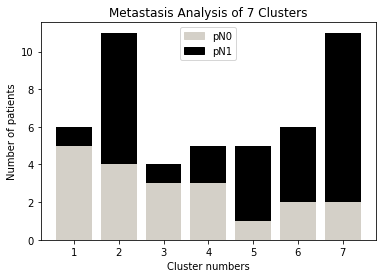

NonMetastasis: [5. 4. 1. 2. 4. 2.]
Metastasis: [ 2.  2.  3. 10.  6.  7.]


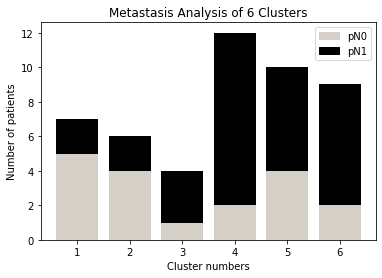

NonMetastasis: [5. 2. 2. 3. 4.]
Metastasis: [ 2. 10.  6.  5.  6.]


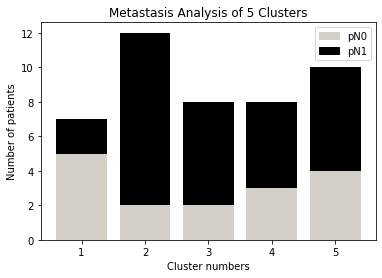

NonMetastasis: [3. 2. 2. 5.]
Metastasis: [ 5.  3. 11.  5.]


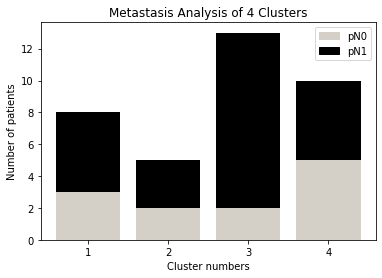

NonMetastasis: [3. 6. 3.]
Metastasis: [ 4.  7. 10.]


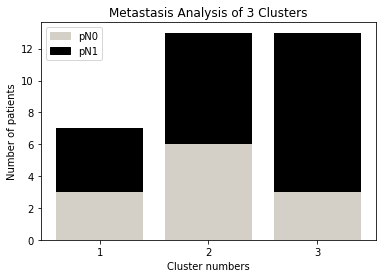

In [201]:
# Plots Non-Metastasis and Metastasis clusters
%matplotlib inline

state011, state111  =   metastasis_status(kmeans_11.labels_, Clinical_data,train_ID_pixels)
state010, state110  =   metastasis_status(kmeans_10.labels_, Clinical_data,train_ID_pixels)
state09,  state19   =   metastasis_status(kmeans_9.labels_, Clinical_data,train_ID_pixels)
state08,  state18   =   metastasis_status(kmeans_8.labels_, Clinical_data,train_ID_pixels)
state07,  state17   =   metastasis_status(kmeans_7.labels_, Clinical_data,train_ID_pixels)
state06,  state16   =   metastasis_status(kmeans_6.labels_, Clinical_data,train_ID_pixels)
state05,  state15   =   metastasis_status(kmeans_5.labels_, Clinical_data,train_ID_pixels)
state04,  state14   =   metastasis_status(kmeans_4.labels_, Clinical_data,train_ID_pixels)
state03,  state13   =   metastasis_status(kmeans_3.labels_, Clinical_data,train_ID_pixels)

# Plots bar plot of Non-Metastasis and Metastasis clusters
plot_metastasis_status(state011, state111)
plot_metastasis_status(state010, state110)
plot_metastasis_status(state09, state19)
plot_metastasis_status(state08, state18)
plot_metastasis_status(state07, state17)
plot_metastasis_status(state06, state16)
plot_metastasis_status(state05, state15)
plot_metastasis_status(state04, state14)
plot_metastasis_status(state03, state13)

# Create dict to save kmeans results and select them later
kmeans_dict = {"11_Clusters": [kmeans_11.labels_,state011] , "10_Clusters": [kmeans_10.labels_,state010],"9_Clusters": [kmeans_9.labels_,state09], "8_Clusters": [kmeans_8.labels_,state08] , "7_Clusters": [kmeans_7.labels_,state07]  , "6_Clusters": [kmeans_6.labels_,state06] , "5_Clusters": [kmeans_5.labels_,state05], "4_Clusters": [kmeans_4.labels_,state04], "3_Clusters": [kmeans_3.labels_,state03]}

In [202]:
# Select the correct kmeans that shows best results from metastasis analysis, must have one fully metastasis cluster
selected_clusters_value = 8

# ----------------------------------------------------------------------------------

In [203]:
# Detect the fully metastasis cluster, select the correct kmeans that shows best results from metastasis analysis
labels = kmeans_dict[str(selected_clusters_value)+"_Clusters"][0]
selected_state = kmeans_dict[str(selected_clusters_value)+"_Clusters"][1]

fully_metastasis_cluster_label = 0
for cluster in selected_state:
    if not cluster: # Cluster list is empty, has no healthy patients, so it's fully metastasis cluster
        break # fully_metastasis_cluster_label now has the right label, exit loop
    
    fully_metastasis_cluster_label += 1

print("Fully metastasis cluster label's index is {} and it is cluster {}".format(fully_metastasis_cluster_label,fully_metastasis_cluster_label+1))

Fully metastasis cluster label's index is 1 and it is cluster 2


In [99]:
# Manually input fully metastatic cluster label if needed
fully_metastasis_cluster_label = 9

print("Fully metastasis cluster label's index is {} and it is cluster {}".format(fully_metastasis_cluster_label,fully_metastasis_cluster_label+1))

Fully metastasis cluster label's index is 9 and it is cluster 10


In [204]:
# Run R file in order to generate significant proteins using the csv file
protein_dataframe = SAM_Analysis(labels, Clinical_data, train_ID_pixels, fully_metastasis_cluster_label, train_data, peak_list)
protein_dataframe.to_csv("BreastCancerAverageSpectrumValues.csv",index=False)

In [205]:
# Need to read significant protein file outputted from R

SAM_protein = readSignificantProteins("significant_breast_proteins.json",delete=False)
SAM_protein = SAM_protein + readSignificantProteins("significant_breast_proteins_up.json",delete=False)

SAM_protein_indices=[]
for i in range(len(peak_list)):

    if peak_list[i][0] in SAM_protein:
        SAM_protein_indices.append(i)

train_scaled_selected_proteins_data = train_scaled_data[:,SAM_protein_indices]
test_scaled_selected_proteins_data = test_scaled_data[:,SAM_protein_indices]

train_selected_proteins_data = train_data[:,SAM_protein_indices]
test_selected_proteins_data = test_data[:,SAM_protein_indices]

train_labels = TargetLabelsCreation(labels , Clinical_data, train_ID_pixels, fully_metastasis_cluster_label)
print(SAM_protein)

[6650, 6277, 6980, 11652, 7009, 4965, 4999, 6224, 9265]


In [ ]:
# Visualizing protein intensity in tSNE map

protein_ion = 6650
protein_index = protein_dataframe.columns.get_loc(protein_ion)

cmhot = plt.get_cmap("hot") #name of cmap u want from matplotlib

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter_3d = ax.scatter(
    xs=tsne_df['tSNE_dim1'], 
    ys=tsne_df['tSNE_dim2'], 
    zs=tsne_df['tSNE_dim3'], 
    c = train_data[:,protein_index],
    cmap = cmhot,
    s = 5,
    alpha = 1,
)

ax.set_xlabel('tSNE_dim1')
ax.set_ylabel('tSNE_dim2')
ax.set_zlabel('tSNE_dim3')


# elev is z-axis, +ve moves up, -ve moves down
# azim is x axis, +ve moves right, -ve moves left
ax.view_init(elev = 30 , azim = -150) 
plt.tight_layout()

In [ ]:
# Visualizing fully metastatic cluster 

cmap_red_black = CreateColorMap(2,["red","black"])

fully_metastasis_labels = copy.deepcopy(labels)
fully_metastasis_indices = np.where(labels == fully_metastasis_cluster_label)[0]
fully_metastasis_labels[fully_metastasis_indices] = -1
fully_metastasis_labels[fully_metastasis_labels != -1] = 0

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter_3d = ax.scatter(
    xs=tsne_df['tSNE_dim1'], 
    ys=tsne_df['tSNE_dim2'], 
    zs=tsne_df['tSNE_dim3'], 
    c = fully_metastasis_labels,
    cmap = cmap_red_black,
    s = 5,
    alpha = 1,
)

ax.set_xlabel('tSNE_dim1')
ax.set_ylabel('tSNE_dim2')
ax.set_zlabel('tSNE_dim3')


# elev is z-axis, +ve moves up, -ve moves down
# azim is x axis, +ve moves right, -ve moves left
ax.view_init(elev = 30 , azim = -150) 
plt.tight_layout()

In [183]:
# SVM Model , predicting labels
# Test rbf at c = 0.1 , 1 , 10
# Test linear at c = 0.1 , 1 , 10
C_value = 0.1
y_pred_SVM = SVM("rbf" , C_value , train_selected_proteins_data , train_labels , test_selected_proteins_data)

In [184]:
# Calculating SVM Probability Metastasis values
Metastasis_prob, Non_Metastasis_prob = ProbabilityCalc(y_pred_SVM)
Surv_SVM = [Metastasis_prob , Non_Metastasis_prob]

Metastasis probability : 20.13422818791946 
Non-Metastasis probability : 79.86577181208054


In [185]:
# KNN Model, predicting labels
K_value= 2
y_pred_KNN = KNN(K_value, train_selected_proteins_data, train_labels, test_selected_proteins_data)
# 2 , 4 , 8 , 6

In [186]:
# Calculating KNN Probability Metastasis values
Metastasis_prob, Non_Metastasis_prob = ProbabilityCalc(y_pred_KNN)
Surv_KNN = [Metastasis_prob , Non_Metastasis_prob]

Metastasis probability : 10.126332412159494 
Non-Metastasis probability : 89.8736675878405


In [187]:
# Selecting SVM as outputted results
Selected_model = Surv_SVM
Metastasis_prob = round(Selected_model[0],2)
Non_Metastasis_prob = round(Selected_model[1],2)

In [188]:
# Run after model complete to save the result in the total results dataframe, outputting SVM results in dataframe
total_results_dataframe_norm_SVM = OutputDataframe(total_results_dataframe_norm_SVM, testPatient_ID , Clinical_data_full, Non_Metastasis_prob, Metastasis_prob, selected_clusters_value,C_value, SAM_protein)

In [189]:
# Preview SVM results
total_results_dataframe_norm_SVM

,Patient to be predicted/left out,Metastasis-Free Subpopulation,Metastasis Subpopulation,Predicted Metastasis,Metastasis Status,Number of Clusters,SAM Features for each tSNE run on new subset,C Value
0,1,99.890000,0.110000,1,1,7,"Significant Features : m/z = [4965, 5171, 4999...",0.1
1,2,91.451991,8.548009,2,1,7,"Significant Features : m/z = [6650, 6277, 6980...",5.0
2,3,98.408602,1.591398,1,1,6,"Significant Features : m/z = [4965, 4999, 5171...",1.0
3,4,99.940000,0.060000,1,1,6,"Significant Features : m/z = [4965, 5171, 4999...",0.1
4,5,99.733901,0.266099,1,1,6,"Significant Features : m/z = [5171, 4965, 4999...",0.1
5,6,93.700000,6.300000,2,1,9,"Significant Features : m/z = [4999, 4965, 5171...",0.1
6,7,100.000000,0.000000,1,1,10,"Significant Features : m/z = [4965, 5171, 4999...",0.1
7,8,47.640000,52.360000,2,1,10,"Significant Features : m/z = [6277, 6650, 1165...",1.0
8,9,60.460000,39.540000,2,1,6,"Significant Features : m/z = [4965, 4999, 5171...",0.1
9,10,62.430000,37.570000,2,1,9,"Significant Features : m/z = [6650, 11652, 499...",0.1


In [190]:
# Saving SVM results in CSV file
# Only run if needed to save and load at a later time
total_results_dataframe_norm_SVM.to_csv("total_breastCancer_results_norm_SVM.csv" , index = False)

In [191]:
# Selecting KNN as outputted results
Selected_model = Surv_KNN
Metastasis_prob = round(Selected_model[0],2)
Non_Metastasis_prob = round(Selected_model[1],2)

In [192]:
# Run after model complete to save the result in the total results dataframe, outputting KNN results in dataframe
total_results_dataframe_norm_KNN = OutputDataframe(total_results_dataframe_norm_KNN, testPatient_ID , Clinical_data_full, Non_Metastasis_prob, Metastasis_prob, selected_clusters_value,K_value, SAM_protein)

In [193]:
# Preview KNN results
total_results_dataframe_norm_KNN

,Patient to be predicted/left out,Metastasis-Free Subpopulation,Metastasis Subpopulation,Predicted Metastasis,Metastasis Status,Number of Clusters,K Value,SAM Features for each tSNE run on new subset
0,1,80.560000,19.440000,2,1,7,2.0,"Significant Features : m/z = [4965, 5171, 4999..."
1,2,90.632318,9.367681,2,1,7,2.0,"Significant Features : m/z = [6650, 6277, 6980..."
2,3,86.580645,13.419355,2,1,6,2.0,"Significant Features : m/z = [4965, 4999, 5171..."
3,4,93.610000,6.390000,2,1,6,2.0,"Significant Features : m/z = [4965, 5171, 4999..."
4,5,99.201703,0.798297,1,1,6,2.0,"Significant Features : m/z = [5171, 4965, 4999..."
5,6,92.720000,7.280000,2,1,9,2.0,"Significant Features : m/z = [4999, 4965, 5171..."
6,7,99.500000,0.500000,1,1,10,2.0,"Significant Features : m/z = [4965, 5171, 4999..."
7,8,59.570000,40.430000,2,1,10,2.0,"Significant Features : m/z = [6277, 6650, 1165..."
8,9,72.910000,27.090000,2,1,6,2.0,"Significant Features : m/z = [4965, 4999, 5171..."
9,10,72.500000,27.500000,2,1,9,2.0,"Significant Features : m/z = [6650, 11652, 499..."


In [194]:
# Saving KNN results in CSV file
# Only run if needed to save and load at a later time
total_results_dataframe_norm_KNN.to_csv("total_breastCancer_results_norm_KNN.csv" , index = False)